In [1]:
import numpy as np
import matplotlib.pyplot as plt
import phoebe
import matplotlib.cbook
import warnings
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
warnings.filterwarnings('ignore')
logger = phoebe.logger('WARNING')
%matplotlib inline

In [3]:
b = phoebe.open('models/after_optimizers.bundle')

In [4]:
b.models

['after_estimators', 'after_nm']

In [15]:
b.run_compute(,overwrite=True)

100%|█████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  9.34it/s]


<ParameterSet: 8 parameters | kinds: lc, rv>

Mon, 13 Sep 2021 11:48 matplotlib.axes._axes WARNING *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


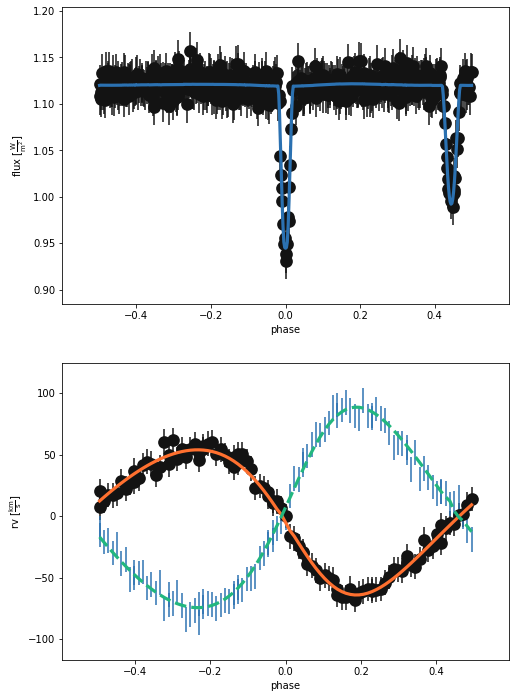

(<autofig.figure.Figure | 2 axes | 6 call(s)>,
 <Figure size 576x864 with 2 Axes>)

In [6]:
b.plot(x='phases',model='after_nm',show=True)

In [21]:
b.set_value_all('pblum_mode', 'dataset-scaled')
b.set_value_all('ld_mode','manual')

In [8]:
b.add_compute('ellc',compute='nm_fit',overwrite=True)

<ParameterSet: 33 parameters | datasets: _default, rv01, lc01>

In [9]:
print(b.filter(qualifier=['ecc','t0_supconj', 'per0','asini', 'teff', 'sma', 'incl', 'q', 'requiv'], context='component'))

ParameterSet: 17 parameters
         requiv@primary@component: 3.262163396950249 solRad
           teff@primary@component: 7508.630260110378 K
C          incl@primary@component: 93.89871900924322 deg
       requiv@secondary@component: 1.352059835318944 solRad
         teff@secondary@component: 7211.080985174411 K
C        incl@secondary@component: 93.89871900924322 deg
            per0@binary@component: 125.30152685701964 deg
             ecc@binary@component: 0.15014954035241074
      t0_supconj@binary@component: 2.4998810118323216 d
            incl@binary@component: 93.89871900924322 deg
               q@binary@component: 0.723926802613807
             sma@binary@component: 29.936074421231986 solRad
C          asini@binary@component: 29.86679633501157 solRad
C           sma@primary@component: 12.571024828730092 solRad
C         asini@primary@component: 12.541932953499249 solRad
C         sma@secondary@component: 17.365049592501897 solRad
C       asini@secondary@component: 17.3248633

In [ ]:
b.flip_constraint('teff@primary',solve_for='teffratio')
#b.flip_constraint('teff@secondary',solve_for='teffratio')

In [22]:
b.flip_constraint('sma@binary',solve_for='asini@binary')
b.flip_constraint('requiv@primary',solve_for='requivsumfrac')

<ConstraintParameter: {requivsumfrac@binary@component} = ({requiv@primary@component} + {requiv@secondary@component}) / {sma@binary@component} (solar units) => 0.1452215437362942>

In [59]:
b.flip_constraint('ecc@binary',solve_for='ecosw')

<ConstraintParameter: {ecosw@binary@component} = {ecc@binary@component} * (cos({per0@binary@component})) (solar units) => -0.08681008093557872>

In [11]:
print(b.run_checks())

Run Checks Report: FAIL
ERROR: fit_parameters contains the constrained parameter 'ecosw@binary@orbit@component' (3 affected parameters, affecting run_solver)


In [12]:
b.remove_solution('nm_sol')

<ParameterSet: 13 parameters | qualifiers: niter, adopt_parameters, nfev, fitted_values, fitted_twigs, fitted_uniqueids, fitted_units, message, success, initial_values, comments, adopt_values, adopt_distributions>

In [13]:
b.add_distribution({'teff@primary':phoebe.gaussian(7600,300),
                    'teff@secondary':phoebe.gaussian(7200,100),
                    'ecc':phoebe.gaussian(0.19,0.005)},
                    distribution='mydist',overwrite_all=True)

<ParameterSet: 3 parameters | components: binary, secondary, primary>

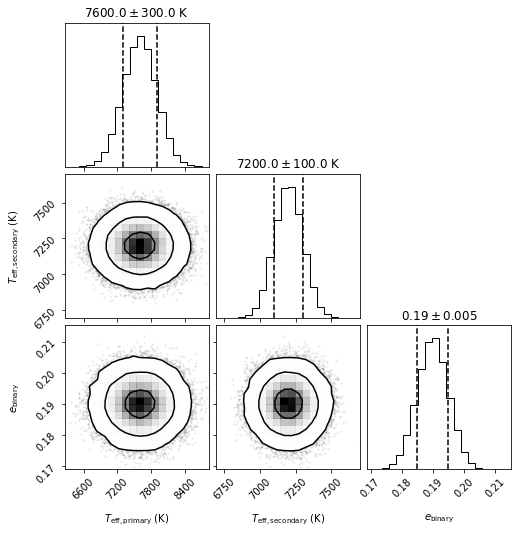

In [14]:
_=b.plot_distribution_collection('mydist',show=True)

In [15]:
b.add_solver('optimizer.nelder_mead',
             fit_parameters=['teff@primary','teff@secondary', 'requiv@primary','requiv@secondary', 'sma@binary','incl@binary', 'q', 'ecc'],
             compute='nm_fit',solver='nm_solver',overwrite=True)

<ParameterSet: 12 parameters | qualifiers: compute, priors, fit_parameters, adaptive, fatol, maxiter, initial_values, comments, maxfev, xatol, priors_combine, expose_lnprobabilities>

In [16]:
phoebe.multiprocessing_set_nprocs(8)
phoebe.multiprocessing_on()


In [17]:
b.set_value('mask_enabled@rv01',False)

In [18]:
phoebe.mpi_off()
phoebe.multiprocessing_on()

In [19]:
b['priors@nm_solver@solver']='mydist'

In [20]:
print(b.get_solver('nm_solver'))

ParameterSet: 12 parameters
        comments@nm_solver@solver: 
         compute@nm_solver@solver: nm_fit
   expose_lnprobabilities@nm_s...: False
   fit_parameters@nm_solver@so...: ['teff@primary', 'teff@secondary', 'requiv@primary', 'requiv@secondary', 'sma@binary', 'incl@binary', 'q', 'ecc']
   initial_values@nm_solver@so...: {}
          priors@nm_solver@solver: ['mydist']
   priors_combine@nm_solver@so...: and
         maxiter@nm_solver@solver: 1000000
          maxfev@nm_solver@solver: 1000000
        adaptive@nm_solver@solver: False
           xatol@nm_solver@solver: 0.0001
           fatol@nm_solver@solver: 0.0001


In [22]:
b.run_solver(solver='nm_solver', maxiter=3000, solution='nm_sol',overwrite=True)

  0%|                                                                                  | 0/3000 [00:00<?, ?it/s]Mon, 13 Sep 2021 11:51 PARAMETERS   WARNING wrapping value of mean_anom to 251.4404021502562 deg
Mon, 13 Sep 2021 11:51 PARAMETERS   WARNING wrapping value of mean_anom to 251.13171189389863 deg
Mon, 13 Sep 2021 11:51 PARAMETERS   WARNING wrapping value of mean_anom to 251.10589156447122 deg
  0%|                                                                       | 1/3000 [00:25<21:19:38, 25.60s/it]Mon, 13 Sep 2021 11:51 PARAMETERS   WARNING wrapping value of mean_anom to 251.05420641945187 deg
Mon, 13 Sep 2021 11:51 PARAMETERS   WARNING wrapping value of mean_anom to 251.09297584040826 deg
  0%|                                                                       | 2/3000 [00:32<12:21:34, 14.84s/it]Mon, 13 Sep 2021 11:51 PARAMETERS   WARNING wrapping value of mean_anom to 251.06713326884682 deg
Mon, 13 Sep 2021 11:51 PARAMETERS   WARNING wrapping value of mean_anom to 25

<ParameterSet: 13 parameters | qualifiers: niter, adopt_parameters, nfev, fitted_values, fitted_twigs, fitted_uniqueids, fitted_units, message, success, initial_values, comments, adopt_values, adopt_distributions>

In [23]:
print(b.get_solution('nm_sol').filter(qualifier=['message', 'nfev', 'niter', 'success']))

ParameterSet: 4 parameters
R         message@nm_sol@solution: Optimization terminated successfully.
R            nfev@nm_sol@solution: 679
R           niter@nm_sol@solution: 389
R         success@nm_sol@solution: True


In [24]:
print(b.adopt_solution('nm_sol', trial_run=True))

Mon, 13 Sep 2021 12:54 BUNDLE       WARNING solution='nm_sol' is not included in run_checks_solution@setting, so will not raise interactive warnings


ParameterSet: 8 parameters
      teff@primary@star@component: 7538.6983214449265 K
    teff@secondary@star@component: 7208.085229057414 K
    requiv@primary@star@component: 3.2679715862714684 solRad
   requiv@secondary@star@compo...: 1.3463197163533884 solRad
       sma@binary@orbit@component: 29.94087819710599 solRad
      incl@binary@orbit@component: 93.85501459925169 deg
         q@binary@orbit@component: 0.7236917869119872
       ecc@binary@orbit@component: 0.1552366033628666


In [25]:
print(b.adopt_solution('nm_sol', trial_run=True))

Mon, 13 Sep 2021 12:56 BUNDLE       WARNING solution='nm_sol' is not included in run_checks_solution@setting, so will not raise interactive warnings


ParameterSet: 8 parameters
      teff@primary@star@component: 7538.6983214449265 K
    teff@secondary@star@component: 7208.085229057414 K
    requiv@primary@star@component: 3.2679715862714684 solRad
   requiv@secondary@star@compo...: 1.3463197163533884 solRad
       sma@binary@orbit@component: 29.94087819710599 solRad
      incl@binary@orbit@component: 93.85501459925169 deg
         q@binary@orbit@component: 0.7236917869119872
       ecc@binary@orbit@component: 0.1552366033628666


In [26]:
b.adopt_solution('nm_sol')

Mon, 13 Sep 2021 12:57 BUNDLE       WARNING solution='nm_sol' is not included in run_checks_solution@setting, so will not raise interactive warnings
Mon, 13 Sep 2021 12:57 PARAMETERS   WARNING wrapping value of mean_anom to 251.3079669640345 deg


<ParameterSet: 30 parameters | contexts: dataset, component>

In [27]:
print(b.filter(qualifier=['ecc','t0_supconj', 'per0','asini', 'teff', 'sma', 'incl', 'q', 'requiv'], context='component'))

ParameterSet: 17 parameters
         requiv@primary@component: 3.2679715862714684 solRad
           teff@primary@component: 7538.6983214449265 K
C          incl@primary@component: 93.85501459925169 deg
       requiv@secondary@component: 1.3463197163533884 solRad
         teff@secondary@component: 7208.085229057414 K
C        incl@secondary@component: 93.85501459925169 deg
            per0@binary@component: 125.30152685701964 deg
             ecc@binary@component: 0.1552366033628666
      t0_supconj@binary@component: 2.4998810118323216 d
            incl@binary@component: 93.85501459925169 deg
               q@binary@component: 0.7236917869119872
             sma@binary@component: 29.94087819710599 solRad
C          asini@binary@component: 29.873133159866793 solRad
C           sma@primary@component: 12.570674066386424 solRad
C         asini@primary@component: 12.542231320748071 solRad
C         sma@secondary@component: 17.370204130719568 solRad
C       asini@secondary@component: 17.3309

In [28]:
b.run_compute(compute='phoebe01', model='after_nm',overwrite=True)


100%|█████████████████████████████████████████████████████████████████████████| 501/501 [03:29<00:00,  2.39it/s]


<ParameterSet: 8 parameters | kinds: rv, lc>

In [29]:
b.models

['after_estimators', 'after_nm']

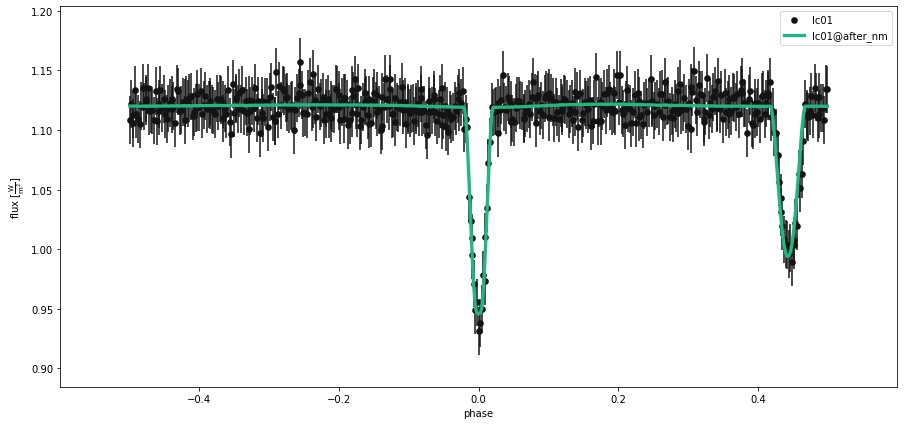

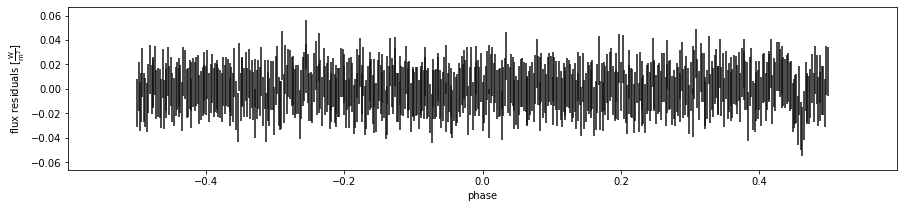

In [30]:
fig1=plt.figure(figsize=[15,7])
_ = b.plot(x='phases', 
           c={'after_nm': 'green', 'dataset': 'black'}, 
           linestyle={'after_nm': 'solid'},
           dataset='lc01',
           model='after_nm',
           marker={'dataset': '.'},fig=fig1, show=True,legend=True)
fig=plt.figure(figsize=[14.85,3])
_=b.plot(model='after_nm', x='phase',y='residuals',c='black',dataset='lc01',fig=fig,pad_aspect=False, show=True)

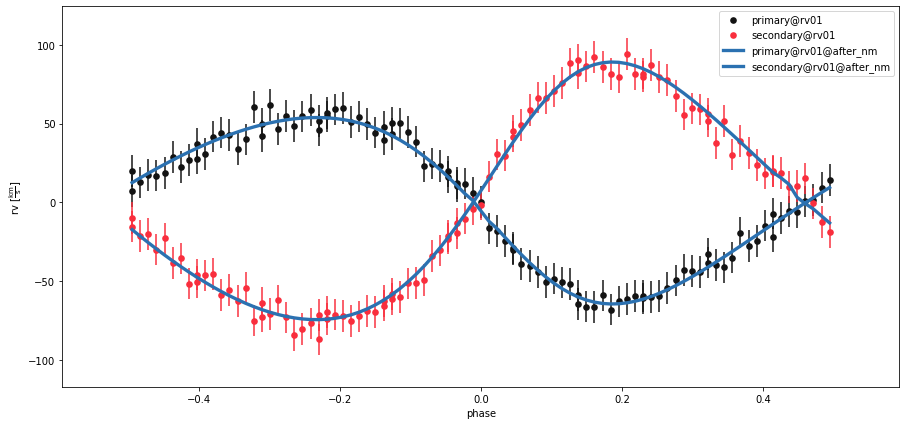

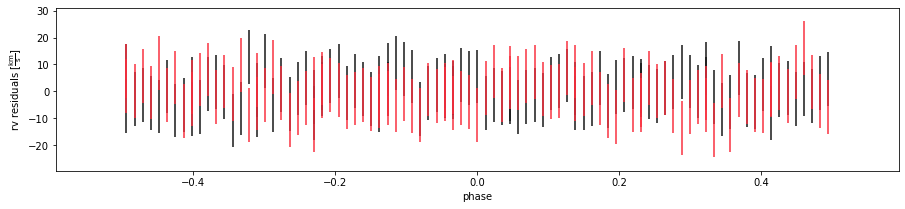

In [51]:
fig1=plt.figure(figsize=[15,7])
_ = b.plot(x='phases', 
           c={'primary@rv01@dataset':'black','secondary@rv01@dataset':'red','primary@after_nm':'blue','secondary@after_nm':'blue'}, 
           linestyle={'after_nm': 'solid'},
           dataset='rv01',
           model='after_nm',
           marker={'dataset': '.'},fig=fig1, show=True,legend=True)
fig=plt.figure(figsize=[15.1,3])
_=b.plot(model='after_nm', x='phase',y='residuals',c={'primary@rv01':'black','secondary@rv01':'red'},dataset='rv01',fig=fig, show=True)

In [52]:
b.rename_compute('nm_fit','fastcompute',overwrite=True)

<ParameterSet: 29 parameters | contexts: compute, solution>

In [53]:
b.save('models/after_optimizers.bundle')

'models/after_optimizers.bundle'

In [77]:
b.models

['after_estimators', 'after_nm']